In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils


Using TensorFlow backend.


In [49]:
a = pd.read_csv('array.csv')
p = pd.read_csv('pointers.csv')
f = pd.read_csv('function.csv')
l = pd.read_csv('loop.csv')
vali = pd.read_csv('TensorFlowData.csv')

frames = [a, p, f, l, vali]

data = pd.concat(frames)

#data = pd.read_csv('teste.csv')

In [50]:
data

,Title,Type
0,"Ruby: After inserting arrays into a list, how ...",array
1,Are the subscripts for three-dimensional array...,array
2,java - find all combinations of given numbers ...,array
3,How to extract array of names from array of em...,array
4,List of arrays/pointers c++,array
5,reading from bmp and writing to another bmp fi...,array
6,Returning the values of an 'ndarray' using an ...,array
7,Faster parsing of array in php,array
8,Getting object or array value for Auth on Fire...,array
9,JSON.parse to array,array


In [51]:
data['Type'].value_counts()

pointers    125
function    125
loop        125
array       125
Name: Type, dtype: int64

In [52]:
# Split data into train and test
train_size = int(len(data) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))

Train size: 400
Test size: 100


In [53]:
train_posts = data['Title'][:train_size]
train_tags = data['Type'][:train_size]

test_posts = data['Title'][train_size:]
test_tags = data['Type'][train_size:]

In [54]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [55]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [56]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)


In [57]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)


In [58]:

# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (400, 1000)
x_test shape: (100, 1000)
y_train shape: (400, 4)
y_test shape: (100, 4)


In [59]:
# This model trains very quickly and 2 epochs are already more than enough
# Training for more epochs will likely lead to overfitting on this dataset
# You can try tweaking these hyperparamaters when using this model with your own data
batch_size = 512
epochs = 600

In [60]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#dpt_model = keras.models.Sequential([
   # keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(max_words,)),
   # keras.layers.Dropout(0.5),
   # keras.layers.Dense(512, activation=tf.nn.relu),
   # keras.layers.Dropout(0.5),
  #  keras.layers.Dense(1, activation=tf.nn.sigmoid)
#])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', 'binary_crossentropy'])

In [61]:
# model.fit trains the model
# The validation_split param tells Keras what % of our training data should be used in the validation set
# You can see the validation loss decreasing slowly when you run this
# Because val_loss is no longer decreasing we stop training to prevent overfitting
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.2)

Train on 320 samples, validate on 80 samples
Epoch 1/600
 - 1s - loss: 0.5654 - acc: 0.7500 - binary_crossentropy: 0.5654 - val_loss: 0.5712 - val_acc: 0.7500 - val_binary_crossentropy: 0.5712
Epoch 2/600
 - 0s - loss: 0.5470 - acc: 0.7500 - binary_crossentropy: 0.5470 - val_loss: 0.5876 - val_acc: 0.7500 - val_binary_crossentropy: 0.5876
Epoch 3/600
 - 0s - loss: 0.5264 - acc: 0.7500 - binary_crossentropy: 0.5264 - val_loss: 0.6033 - val_acc: 0.7500 - val_binary_crossentropy: 0.6033
Epoch 4/600
 - 0s - loss: 0.5065 - acc: 0.7508 - binary_crossentropy: 0.5065 - val_loss: 0.6185 - val_acc: 0.7500 - val_binary_crossentropy: 0.6185
Epoch 5/600
 - 0s - loss: 0.4876 - acc: 0.7500 - binary_crossentropy: 0.4876 - val_loss: 0.6333 - val_acc: 0.7500 - val_binary_crossentropy: 0.6333
Epoch 6/600
 - 0s - loss: 0.4708 - acc: 0.7531 - binary_crossentropy: 0.4708 - val_loss: 0.6472 - val_acc: 0.7500 - val_binary_crossentropy: 0.6472
Epoch 7/600
 - 0s - loss: 0.4509 - acc: 0.7523 - binary_crossentrop

Epoch 56/600
 - 0s - loss: 0.0321 - acc: 0.9914 - binary_crossentropy: 0.0321 - val_loss: 0.7168 - val_acc: 0.6719 - val_binary_crossentropy: 0.7168
Epoch 57/600
 - 0s - loss: 0.0310 - acc: 0.9898 - binary_crossentropy: 0.0310 - val_loss: 0.7114 - val_acc: 0.6750 - val_binary_crossentropy: 0.7114
Epoch 58/600
 - 0s - loss: 0.0289 - acc: 0.9914 - binary_crossentropy: 0.0289 - val_loss: 0.7064 - val_acc: 0.6781 - val_binary_crossentropy: 0.7064
Epoch 59/600
 - 0s - loss: 0.0293 - acc: 0.9906 - binary_crossentropy: 0.0293 - val_loss: 0.7017 - val_acc: 0.6781 - val_binary_crossentropy: 0.7017
Epoch 60/600
 - 0s - loss: 0.0298 - acc: 0.9883 - binary_crossentropy: 0.0298 - val_loss: 0.6975 - val_acc: 0.6812 - val_binary_crossentropy: 0.6975
Epoch 61/600
 - 0s - loss: 0.0297 - acc: 0.9883 - binary_crossentropy: 0.0297 - val_loss: 0.6936 - val_acc: 0.6875 - val_binary_crossentropy: 0.6936
Epoch 62/600
 - 0s - loss: 0.0289 - acc: 0.9852 - binary_crossentropy: 0.0289 - val_loss: 0.6898 - val_acc

Epoch 111/600
 - 0s - loss: 0.0224 - acc: 0.9844 - binary_crossentropy: 0.0224 - val_loss: 0.6602 - val_acc: 0.7312 - val_binary_crossentropy: 0.6602
Epoch 112/600
 - 0s - loss: 0.0203 - acc: 0.9891 - binary_crossentropy: 0.0203 - val_loss: 0.6607 - val_acc: 0.7312 - val_binary_crossentropy: 0.6607
Epoch 113/600
 - 0s - loss: 0.0194 - acc: 0.9867 - binary_crossentropy: 0.0194 - val_loss: 0.6608 - val_acc: 0.7312 - val_binary_crossentropy: 0.6608
Epoch 114/600
 - 0s - loss: 0.0197 - acc: 0.9852 - binary_crossentropy: 0.0197 - val_loss: 0.6606 - val_acc: 0.7312 - val_binary_crossentropy: 0.6606
Epoch 115/600
 - 0s - loss: 0.0197 - acc: 0.9859 - binary_crossentropy: 0.0197 - val_loss: 0.6608 - val_acc: 0.7312 - val_binary_crossentropy: 0.6608
Epoch 116/600
 - 0s - loss: 0.0191 - acc: 0.9875 - binary_crossentropy: 0.0191 - val_loss: 0.6614 - val_acc: 0.7344 - val_binary_crossentropy: 0.6614
Epoch 117/600
 - 0s - loss: 0.0177 - acc: 0.9898 - binary_crossentropy: 0.0177 - val_loss: 0.6625 - 

Epoch 166/600
 - 0s - loss: 0.0178 - acc: 0.9906 - binary_crossentropy: 0.0178 - val_loss: 0.6903 - val_acc: 0.7281 - val_binary_crossentropy: 0.6903
Epoch 167/600
 - 0s - loss: 0.0176 - acc: 0.9875 - binary_crossentropy: 0.0176 - val_loss: 0.6906 - val_acc: 0.7281 - val_binary_crossentropy: 0.6906
Epoch 168/600
 - 0s - loss: 0.0178 - acc: 0.9891 - binary_crossentropy: 0.0178 - val_loss: 0.6913 - val_acc: 0.7281 - val_binary_crossentropy: 0.6913
Epoch 169/600
 - 0s - loss: 0.0163 - acc: 0.9891 - binary_crossentropy: 0.0163 - val_loss: 0.6922 - val_acc: 0.7281 - val_binary_crossentropy: 0.6922
Epoch 170/600
 - 0s - loss: 0.0174 - acc: 0.9859 - binary_crossentropy: 0.0174 - val_loss: 0.6927 - val_acc: 0.7250 - val_binary_crossentropy: 0.6927
Epoch 171/600
 - 0s - loss: 0.0155 - acc: 0.9898 - binary_crossentropy: 0.0155 - val_loss: 0.6930 - val_acc: 0.7250 - val_binary_crossentropy: 0.6930
Epoch 172/600
 - 0s - loss: 0.0187 - acc: 0.9898 - binary_crossentropy: 0.0187 - val_loss: 0.6931 - 

Epoch 221/600
 - 0s - loss: 0.0182 - acc: 0.9898 - binary_crossentropy: 0.0182 - val_loss: 0.7081 - val_acc: 0.7281 - val_binary_crossentropy: 0.7081
Epoch 222/600
 - 0s - loss: 0.0178 - acc: 0.9859 - binary_crossentropy: 0.0178 - val_loss: 0.7076 - val_acc: 0.7281 - val_binary_crossentropy: 0.7076
Epoch 223/600
 - 0s - loss: 0.0184 - acc: 0.9875 - binary_crossentropy: 0.0184 - val_loss: 0.7073 - val_acc: 0.7281 - val_binary_crossentropy: 0.7073
Epoch 224/600
 - 0s - loss: 0.0203 - acc: 0.9852 - binary_crossentropy: 0.0203 - val_loss: 0.7071 - val_acc: 0.7281 - val_binary_crossentropy: 0.7071
Epoch 225/600
 - 0s - loss: 0.0142 - acc: 0.9953 - binary_crossentropy: 0.0142 - val_loss: 0.7068 - val_acc: 0.7281 - val_binary_crossentropy: 0.7068
Epoch 226/600
 - 0s - loss: 0.0182 - acc: 0.9875 - binary_crossentropy: 0.0182 - val_loss: 0.7060 - val_acc: 0.7281 - val_binary_crossentropy: 0.7060
Epoch 227/600
 - 0s - loss: 0.0172 - acc: 0.9875 - binary_crossentropy: 0.0172 - val_loss: 0.7054 - 

Epoch 276/600
 - 0s - loss: 0.0172 - acc: 0.9859 - binary_crossentropy: 0.0172 - val_loss: 0.7143 - val_acc: 0.7250 - val_binary_crossentropy: 0.7143
Epoch 277/600
 - 0s - loss: 0.0169 - acc: 0.9875 - binary_crossentropy: 0.0169 - val_loss: 0.7142 - val_acc: 0.7250 - val_binary_crossentropy: 0.7142
Epoch 278/600
 - 0s - loss: 0.0190 - acc: 0.9859 - binary_crossentropy: 0.0190 - val_loss: 0.7145 - val_acc: 0.7250 - val_binary_crossentropy: 0.7145
Epoch 279/600
 - 0s - loss: 0.0133 - acc: 0.9937 - binary_crossentropy: 0.0133 - val_loss: 0.7149 - val_acc: 0.7312 - val_binary_crossentropy: 0.7149
Epoch 280/600
 - 0s - loss: 0.0164 - acc: 0.9891 - binary_crossentropy: 0.0164 - val_loss: 0.7158 - val_acc: 0.7281 - val_binary_crossentropy: 0.7158
Epoch 281/600
 - 0s - loss: 0.0161 - acc: 0.9922 - binary_crossentropy: 0.0161 - val_loss: 0.7166 - val_acc: 0.7312 - val_binary_crossentropy: 0.7166
Epoch 282/600
 - 0s - loss: 0.0179 - acc: 0.9875 - binary_crossentropy: 0.0179 - val_loss: 0.7173 - 

Epoch 331/600
 - 0s - loss: 0.0136 - acc: 0.9922 - binary_crossentropy: 0.0136 - val_loss: 0.7225 - val_acc: 0.7375 - val_binary_crossentropy: 0.7225
Epoch 332/600
 - 0s - loss: 0.0152 - acc: 0.9891 - binary_crossentropy: 0.0152 - val_loss: 0.7223 - val_acc: 0.7375 - val_binary_crossentropy: 0.7223
Epoch 333/600
 - 0s - loss: 0.0169 - acc: 0.9867 - binary_crossentropy: 0.0169 - val_loss: 0.7224 - val_acc: 0.7406 - val_binary_crossentropy: 0.7224
Epoch 334/600
 - 0s - loss: 0.0175 - acc: 0.9852 - binary_crossentropy: 0.0175 - val_loss: 0.7231 - val_acc: 0.7406 - val_binary_crossentropy: 0.7231
Epoch 335/600
 - 0s - loss: 0.0156 - acc: 0.9891 - binary_crossentropy: 0.0156 - val_loss: 0.7234 - val_acc: 0.7406 - val_binary_crossentropy: 0.7234
Epoch 336/600
 - 0s - loss: 0.0169 - acc: 0.9844 - binary_crossentropy: 0.0169 - val_loss: 0.7240 - val_acc: 0.7406 - val_binary_crossentropy: 0.7240
Epoch 337/600
 - 0s - loss: 0.0184 - acc: 0.9867 - binary_crossentropy: 0.0184 - val_loss: 0.7254 - 

Epoch 386/600
 - 0s - loss: 0.0148 - acc: 0.9922 - binary_crossentropy: 0.0148 - val_loss: 0.7496 - val_acc: 0.7281 - val_binary_crossentropy: 0.7496
Epoch 387/600
 - 0s - loss: 0.0150 - acc: 0.9914 - binary_crossentropy: 0.0150 - val_loss: 0.7502 - val_acc: 0.7281 - val_binary_crossentropy: 0.7502
Epoch 388/600
 - 0s - loss: 0.0160 - acc: 0.9898 - binary_crossentropy: 0.0160 - val_loss: 0.7505 - val_acc: 0.7312 - val_binary_crossentropy: 0.7505
Epoch 389/600
 - 0s - loss: 0.0165 - acc: 0.9906 - binary_crossentropy: 0.0165 - val_loss: 0.7509 - val_acc: 0.7312 - val_binary_crossentropy: 0.7509
Epoch 390/600
 - 0s - loss: 0.0159 - acc: 0.9906 - binary_crossentropy: 0.0159 - val_loss: 0.7513 - val_acc: 0.7312 - val_binary_crossentropy: 0.7513
Epoch 391/600
 - 0s - loss: 0.0177 - acc: 0.9875 - binary_crossentropy: 0.0177 - val_loss: 0.7514 - val_acc: 0.7312 - val_binary_crossentropy: 0.7514
Epoch 392/600
 - 0s - loss: 0.0150 - acc: 0.9891 - binary_crossentropy: 0.0150 - val_loss: 0.7515 - 

Epoch 441/600
 - 0s - loss: 0.0161 - acc: 0.9875 - binary_crossentropy: 0.0161 - val_loss: 0.7604 - val_acc: 0.7281 - val_binary_crossentropy: 0.7604
Epoch 442/600
 - 0s - loss: 0.0165 - acc: 0.9906 - binary_crossentropy: 0.0165 - val_loss: 0.7592 - val_acc: 0.7281 - val_binary_crossentropy: 0.7592
Epoch 443/600
 - 0s - loss: 0.0161 - acc: 0.9891 - binary_crossentropy: 0.0161 - val_loss: 0.7575 - val_acc: 0.7281 - val_binary_crossentropy: 0.7575
Epoch 444/600
 - 0s - loss: 0.0150 - acc: 0.9906 - binary_crossentropy: 0.0150 - val_loss: 0.7555 - val_acc: 0.7281 - val_binary_crossentropy: 0.7555
Epoch 445/600
 - 0s - loss: 0.0156 - acc: 0.9883 - binary_crossentropy: 0.0156 - val_loss: 0.7540 - val_acc: 0.7281 - val_binary_crossentropy: 0.7540
Epoch 446/600
 - 0s - loss: 0.0156 - acc: 0.9891 - binary_crossentropy: 0.0156 - val_loss: 0.7526 - val_acc: 0.7281 - val_binary_crossentropy: 0.7526
Epoch 447/600
 - 0s - loss: 0.0166 - acc: 0.9859 - binary_crossentropy: 0.0166 - val_loss: 0.7515 - 

Epoch 496/600
 - 0s - loss: 0.0138 - acc: 0.9937 - binary_crossentropy: 0.0138 - val_loss: 0.7462 - val_acc: 0.7375 - val_binary_crossentropy: 0.7462
Epoch 497/600
 - 0s - loss: 0.0164 - acc: 0.9906 - binary_crossentropy: 0.0164 - val_loss: 0.7473 - val_acc: 0.7375 - val_binary_crossentropy: 0.7473
Epoch 498/600
 - 0s - loss: 0.0159 - acc: 0.9906 - binary_crossentropy: 0.0159 - val_loss: 0.7486 - val_acc: 0.7375 - val_binary_crossentropy: 0.7486
Epoch 499/600
 - 0s - loss: 0.0169 - acc: 0.9914 - binary_crossentropy: 0.0169 - val_loss: 0.7499 - val_acc: 0.7375 - val_binary_crossentropy: 0.7499
Epoch 500/600
 - 0s - loss: 0.0166 - acc: 0.9906 - binary_crossentropy: 0.0166 - val_loss: 0.7514 - val_acc: 0.7375 - val_binary_crossentropy: 0.7514
Epoch 501/600
 - 0s - loss: 0.0177 - acc: 0.9859 - binary_crossentropy: 0.0177 - val_loss: 0.7528 - val_acc: 0.7375 - val_binary_crossentropy: 0.7528
Epoch 502/600
 - 0s - loss: 0.0147 - acc: 0.9937 - binary_crossentropy: 0.0147 - val_loss: 0.7539 - 

Epoch 551/600
 - 0s - loss: 0.0177 - acc: 0.9891 - binary_crossentropy: 0.0177 - val_loss: 0.7684 - val_acc: 0.7250 - val_binary_crossentropy: 0.7684
Epoch 552/600
 - 0s - loss: 0.0159 - acc: 0.9875 - binary_crossentropy: 0.0159 - val_loss: 0.7681 - val_acc: 0.7250 - val_binary_crossentropy: 0.7681
Epoch 553/600
 - 0s - loss: 0.0129 - acc: 0.9937 - binary_crossentropy: 0.0129 - val_loss: 0.7680 - val_acc: 0.7250 - val_binary_crossentropy: 0.7680
Epoch 554/600
 - 0s - loss: 0.0171 - acc: 0.9859 - binary_crossentropy: 0.0171 - val_loss: 0.7680 - val_acc: 0.7250 - val_binary_crossentropy: 0.7680
Epoch 555/600
 - 0s - loss: 0.0144 - acc: 0.9953 - binary_crossentropy: 0.0144 - val_loss: 0.7683 - val_acc: 0.7281 - val_binary_crossentropy: 0.7683
Epoch 556/600
 - 0s - loss: 0.0149 - acc: 0.9922 - binary_crossentropy: 0.0149 - val_loss: 0.7686 - val_acc: 0.7281 - val_binary_crossentropy: 0.7686
Epoch 557/600
 - 0s - loss: 0.0160 - acc: 0.9937 - binary_crossentropy: 0.0160 - val_loss: 0.7680 - 

In [62]:
# Evaluate the accuracy of our trained model
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

100/100 [==============================] - 0s 70us/step
Test score: 0.12751881778240204
Test accuracy: 0.9449999928474426


In [63]:
# Here's how to generate a prediction on individual examples
text_labels = encoder.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_posts.iloc[i][:50], "...")
    print('Actual label:' + test_tags.iloc[i])
    print("Predicted label: " + predicted_label + "\n")

how to remove jquery filter from function ...
Actual label:function
Predicted label: function

Creating an infinite MP4 with FFMPEG (not looping) ...
Actual label:loop
Predicted label: loop

java - find all combinations of given numbers in a ...
Actual label:array
Predicted label: array

Whats wrong with this program in C? It terminates. ...
Actual label:pointers
Predicted label: pointers

Passing vector to function (pointers/addresses) ...
Actual label:pointers
Predicted label: pointers

How to extract array of names from array of email  ...
Actual label:array
Predicted label: array

in_array function not working as expected ...
Actual label:function
Predicted label: array

not able to understand the testing condition in th ...
Actual label:loop
Predicted label: loop

Print a function name within a function ...
Actual label:function
Predicted label: function

R alternatives to looping for more than 10 million ...
Actual label:loop
Predicted label: loop



In [64]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [65]:
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

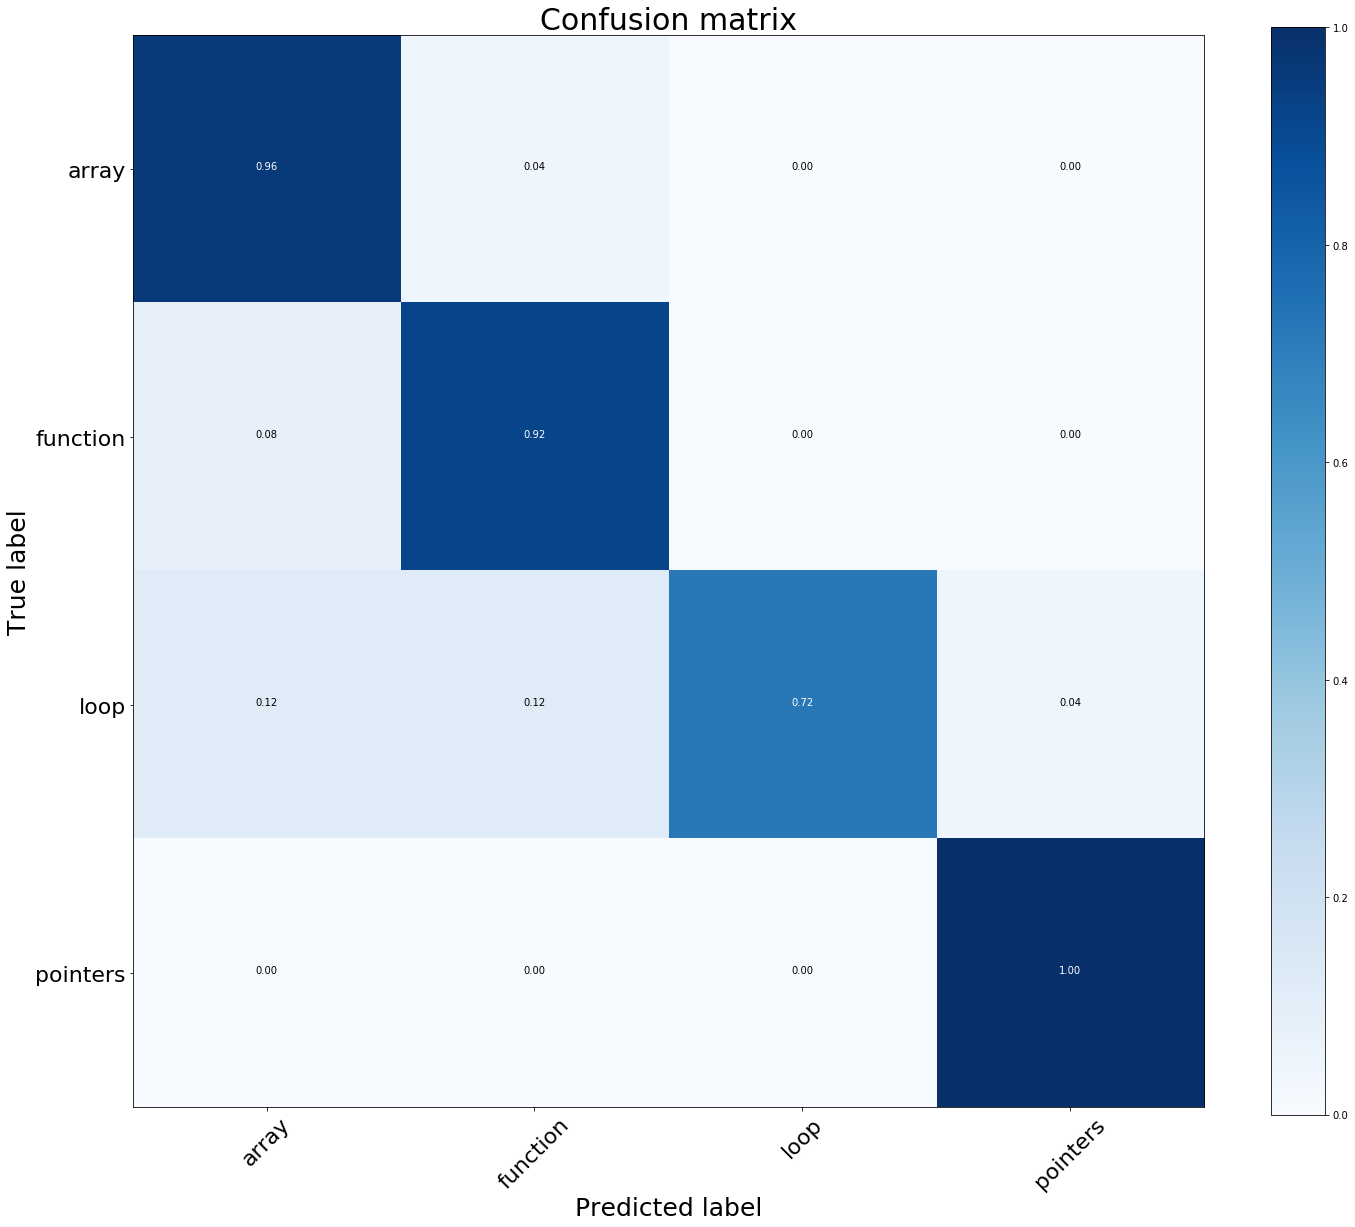

In [66]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()